# 로지스틱 회귀의 성능평가 지표

> 자세한 설명은 README.md 파일 참고

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

from pandas import DataFrame
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve

### [2] 데이터 가져오기

In [3]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'], info=False)

## #02. 데이터 전처리 및 로지스틱 분석

### [1] 0값을 평균으로 대체

In [4]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)

df2 = my_replace_missing_value(df)
my_pretty_table(df2.describe().T)

+--------------------------+---------+----------+----------+-------+---------+---------+---------+-------+
|                          |   count |     mean |      std |   min |     25% |     50% |     75% |   max |
|--------------------------+---------+----------+----------+-------+---------+---------+---------+-------|
| Pregnancies              |     768 |  3.84505 |  3.36958 |     0 |       1 |       3 |       6 |    17 |
| Glucose                  |     768 |  121.687 |  30.4359 |    44 |   99.75 |     117 |  140.25 |   199 |
| BloodPressure            |     768 |  72.4052 |  12.0963 |    24 |      64 | 72.2026 |      80 |   122 |
| SkinThickness            |     768 |  29.1534 |  8.79094 |     7 |      25 | 29.1534 |      32 |    99 |
| Insulin                  |     768 |  155.548 |  85.0211 |    14 |   121.5 | 155.548 | 155.548 |   846 |
| BMI                      |     768 |  32.4575 |  6.87515 |  18.2 |    27.5 |    32.4 |    36.6 |  67.1 |
| DiabetesPedigreeFunction |     768 

### [3] 스케일링 + 데이터 분할

In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Outcome', test_size=0.2, scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [4] 로지스틱 분석 모형

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.772065 |
| 10 |     1 | l2        |          0.767186 |
| 13 |    10 | l2        |          0.765547 |
| 16 |   100 | l2        |          0.765547 |
|  4 |  0.01 | l2        |          0.755738 |
|  1 | 0.001 | l2        |          0.657977 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.258631 |     0.344488 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.775244 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과

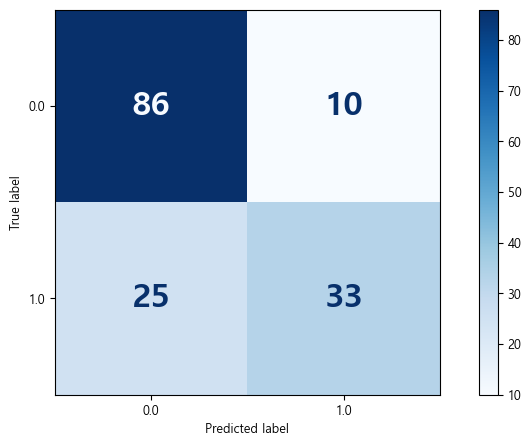


[ROC/PR Curve]


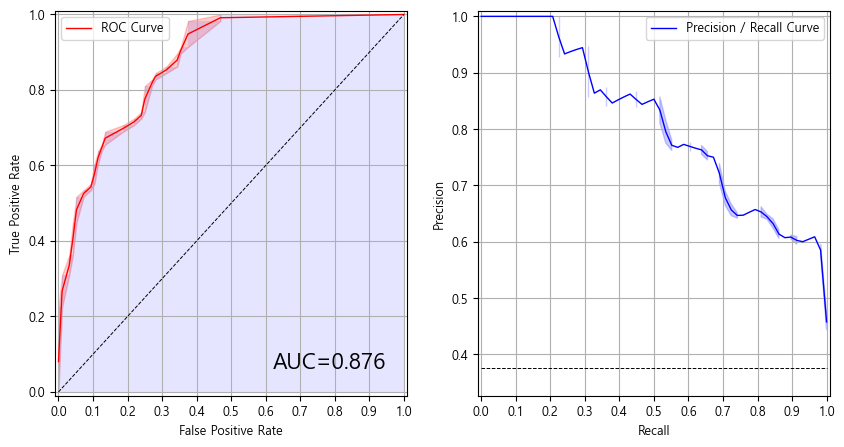


[학습곡선]


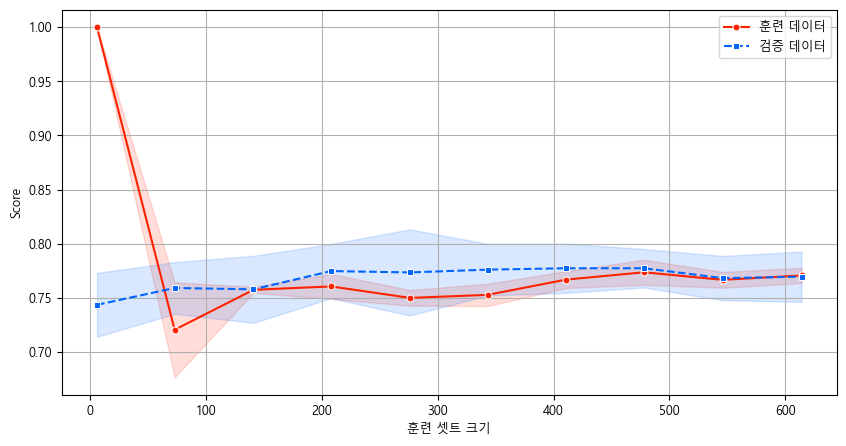

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [6]:
estimator = my_logistic_classification(x_train, y_train, x_test, y_test)
estimator

## #03. 로지스틱의 예측값

### [1] 예측 결과값

`0`, `1`중에서 예측 결과를 의미

In [7]:
y_pred = estimator.predict(x_test)
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

### [2] 위,양성 확률

`0`으로 분류될 확률과 `1`로 분류될 확률을 의미

In [8]:
y_pred_proba = estimator.predict_proba(x_test)
y_pred_proba[:5]

array([[0.14530989, 0.85469011],
       [0.63233476, 0.36766524],
       [0.42204042, 0.57795958],
       [0.9499358 , 0.0500642 ],
       [0.90322991, 0.09677009]])

In [9]:
y_pred_df = DataFrame(y_pred_proba, columns=["0일 확률", "1일 확률"])
my_pretty_table(y_pred_df.head())

+----+------------+------------+
|    |   0일 확률 |   1일 확률 |
|----+------------+------------|
|  0 |    0.14531 |    0.85469 |
|  1 |   0.632335 |   0.367665 |
|  2 |    0.42204 |    0.57796 |
|  3 |   0.949936 |  0.0500642 |
|  4 |    0.90323 |  0.0967701 |
+----+------------+------------+


보통은 `1`로 분류될 확률만 선택적으로 추출함

In [10]:
y_pred_proba_1 = estimator.predict_proba(x_test)[:,1]
y_pred_proba_1[:5]

array([0.85469011, 0.36766524, 0.57795958, 0.0500642 , 0.09677009])

## #04. 의사결정계수

> 다항로지스틱에서는 사용할 수 없음

### [1] 로그손실값

In [11]:
log_loss_test = -log_loss(y_test, y_pred_proba, normalize=False)
log_loss_test

-66.86716472426767

### [2] 로그 손실 계산

In [12]:
y_null = np.ones_like(y_test) * y_test.mean()
log_loss_null = -log_loss(y_test, y_null, normalize=False)
log_loss_null

-102.00757977909427

### [3] 의사결정계수

In [13]:
pseudo_r2 = 1 - (log_loss_test / log_loss_null)
pseudo_r2

0.3444882736256074

## #05. 혼동행렬(오차행렬)

### [1] 혼동행렬 구하기

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[86, 10],
       [25, 33]], dtype=int64)

### [2] 혼동행렬값 분리

> 다항로지스틱에서는 사용할 수 없음

In [15]:
((TN, FP),(FN, TP)) = conf_mat
TN, TP, FN, FP

(86, 33, 25, 10)

### [3] 혼동행렬에 대한 히트맵

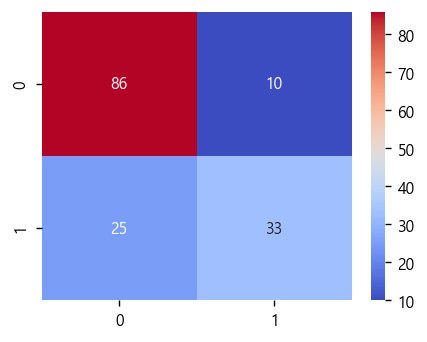

In [16]:
my_heatmap(conf_mat, figsize=(4, 3), dpi=125)

### [4] ConfusionMatrixDisplay 함수 사용

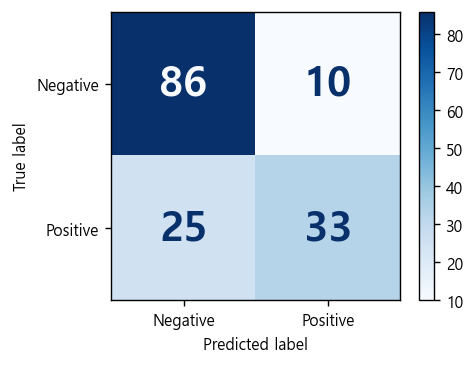

In [17]:
plt.figure(figsize=(4,3), dpi=125)
ax = plt.gca()

ConfusionMatrixDisplay.from_predictions(
    y_test, # 관측치
    y_pred, # 예측치
    display_labels=["Negative", "Positive"],
    cmap='Blues',
    text_kw={'fontsize': 24, 'weight': 'bold'},
    ax=ax
)

# plot.py 파일에서 이미 plt객체를 import하고 있으므로 plt객체 사용 가능
plt.show()
plt.close()

### [5] 성능지표 값들 구하기

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다. 이런 경우 정밀도 혹은 재현율을 사용하는 것이 더욱 바람직하다.

#### (1) 정확도(Accuracy)

전체 데이터(FP+FN+TP+TN)중에서 제대로 판정한 데이터(TP + TN)의 비율

$\text{Accuracy}=\frac{\text{정확히 예측한 데이터 건수}}{\text{전체 예측 데이터 건수}}=\frac{\text{TN}+\text{TP}}{\text{TN}+\text{FP}+\text{FN}+\text{TP}}$

In [18]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.7727272727272727

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7727272727272727

#### (2) 정밀도(Precision)

양성으로 예측한 데이터 중에서 관측치도 양성으로 예측한 비율.

$\text{Precision}=\frac{\text{예측과 실제 값이 Positive로 일치하는 것들}}{\text{Positive로 예측한 것들}}=\frac{\text{TP}}{\text{FP}+\text{TP}}$

실제 음성인 데이터를 양성으로 판단하는 것이 더 큰 문제인 경우에 사용한다.(ex: 스팸 메일 분류 모델)

In [20]:
precision = TP / (FP + TP)
precision

0.7674418604651163

In [21]:
precision = precision_score(y_test, y_pred)
precision

0.7674418604651163

#### (3) 재현율(Recall, TPR)

실제로 양성인 관측치 중에서 양성으로 예측한 비율

TPR(True Positive Rate) 또는 민감도(sensitivity)라고도 한다.

$\text{TPR}=\frac{\text{예측과 실제 값이 Positive로 일치하는 것들}}{\text{실제 값이 Positive인 것들}}=\frac{\text{TP}}{\text{FN}+\text{TP}}$

실제 양성인 데이터를 음성으로 판단하는 것이 더 큰 문제인 경우에 사용한다.(ex: 암 판단 모델)

> 다항로지스틱에서는 사용할 수 없음

In [22]:
tpr = TP / (FN + TP)
tpr

0.5689655172413793

In [23]:
tpr = recall_score(y_test, y_pred)
tpr

0.5689655172413793

#### (4) 위양성율, 거짓 양성 비율(Fallout, FPR)

실제로는 음성인 관측치 중에서 양성으로 예측한 비율

FPR(False Positive Rate)이라고도 한다.

$\text{FPR}=\frac{\text{양성으로 예측한 데이터 건수}}{\text{실제 값이 Negative인 것들}}=\frac{\text{FP}}{\text{FP}+\text{TN}}$

> 다항로지스틱에서는 사용할 수 없음

In [24]:
fpr = FP / (TN + FP)
fpr

0.10416666666666667

#### (5) 특이성(Specificity, TNR)

1에서 위양성률의 값을 뺀 값으로 실제 값 Negative가 정확히 예측되어야 하는 수준을 의미한다.

TNR, True Negative Rate

$\text{TNR}=1-FPR=1-\frac{\text{FP}}{\text{FP}+\text{TN}}$

> 다항로지스틱에서는 사용할 수 없음

In [25]:
tnr = 1 - (FP / (TN + FP))
tnr

0.8958333333333334

#### (6) F1 Score

정밀도(Precision)와 재현율(Recall)을 결합한 지표이다. 

정밀도(Precision)와 재현율(Recall)이 어느 한 쪽으로 치우치지 않을 때 상대적으로 높은 값을 가진다.

$\text{F1}=2 \times \frac{\text{Precision} \times \text{FPR}}{\text{Precision}+\text{FPR}}$

In [26]:
f1 = 2 * (precision * tpr) / (precision + tpr)
f1

0.6534653465346535

In [27]:
f1 = f1_score(y_test, y_pred)
f1

0.6534653465346535

#### (7) ROC Curve

재현율(recall, FPR)을 X축으로, 위양성률(fall-out, TPR)을 Y축으로 잡은 그래프

fpr과 tpr 둘다 양성을 많이 예측할수록 높아지기 때문에 비례한다. FPR 대비 TPR이 좋게 나오도록 해야하는데, 즉 이 fpr과 tpr로 curve를 그렸을 때 curve 아래 면적이 클수록 좋으며 (fpr이 조금만 높아져도 tpr이 큰폭으로 오름) 이것을 시각적으로 확인하기 위해 roc_curve를 이용한다.

> 다항로지스틱에서는 사용할 수 없음

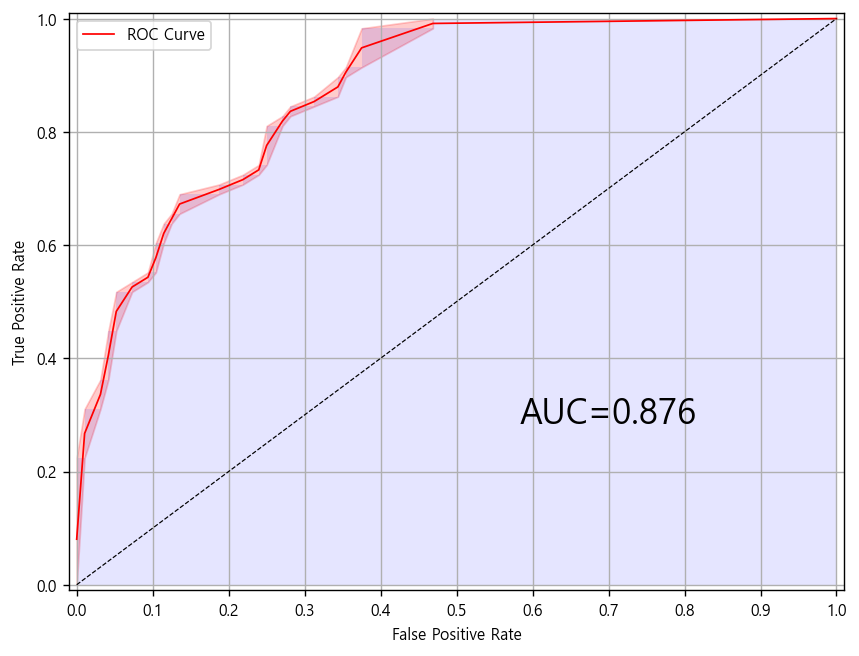

In [28]:
# 두 번째 파라미터가 판정결과가 아닌 1로 판정할 확률값
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_1)

plt.figure(figsize=(8, 6), dpi=125)

sb.lineplot(x=fpr, y=tpr, color='red', linewidth=1, label='ROC Curve')
plt.fill_between(fpr,tpr, facecolor='blue',alpha=0.1)
sb.lineplot(x=[0,1], y=[0,1], color='black', linestyle='--', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xticks(np.round(np.arange(0, 1.1, 0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.text(0.7,0.3, 'AUC=%0.3f' % roc_auc_score(y_test, y_pred_proba_1), fontsize=20, ha='center', va='center')
plt.grid()
plt.show()
plt.close()

#### (8) AUC

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정된다.

ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.

In [29]:
auc = roc_auc_score(y_test, y_pred_proba_1)
auc

0.8760775862068966

#### (9) Precision Recall Curve

정밀도-재현율 곡선

0부터 1사이의 모든 임계값에 따라 x축을 재현율, y축을 정밀도로 그린 그림.

정밀도와 재현율 모두 높을수록(그래프의 오른쪽 위) 좋은 모델.

`precision_recall_curve()` 함수는 관측치와 예측 확률을 인자로 받아 threshold, precision, recall에 해당하는 세 개의 array을 반환한다.

precision과 recall값은 plot했을때 그래프가 항상 y축에서 시작하도록 하기 위해 맨 마지막에 각각 1, 0이 붙는다.

> 다항로지스틱에서는 사용할 수 없음

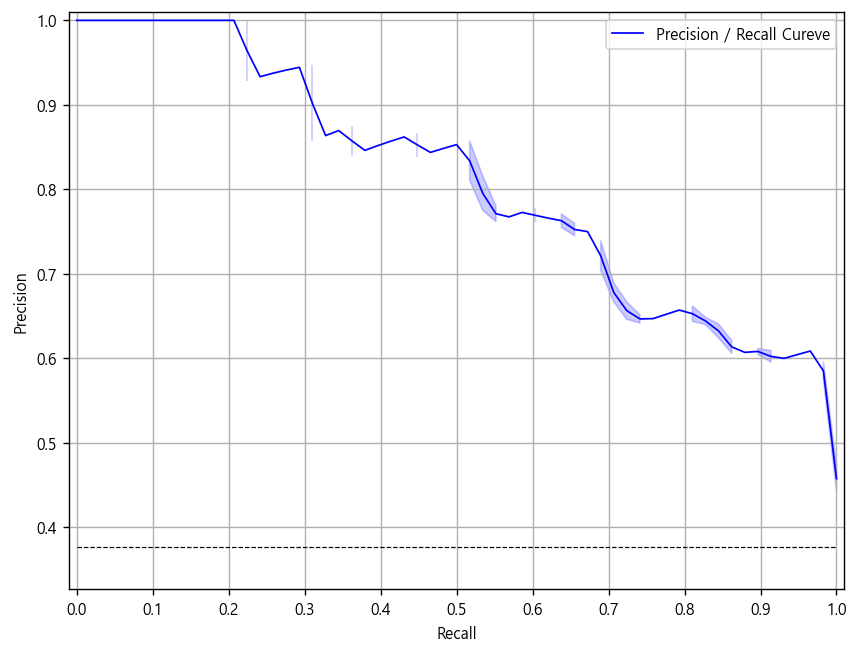

In [30]:
precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_proba_1)
y_test_mean = y_test.mean()

plt.figure(figsize=(8, 6), dpi=125)
sb.lineplot(x=recall, y=precision, label='Precision / Recall Cureve', color='blue', linewidth=1)
sb.lineplot(x=[0,1], y=[y_test_mean,y_test_mean], color='black', linewidth=0.7, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xticks(np.round(np.arange(0, 1.1, 0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(y_test_mean-0.05,1.01)
plt.grid()
plt.show()
plt.close()

#### (10) 학습곡선

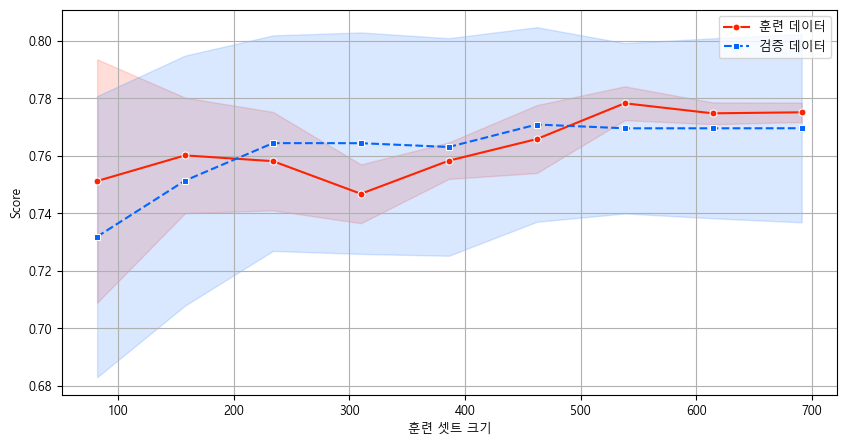

In [31]:
my_learing_curve(estimator, origin, 'Outcome', figsize=(10, 5), dpi=100)

## #06. ROC Curve 해석 방법

`True Positive Rate`와 `False Positive Rate`

`Recall`은 `True Positive Rate`의 다른 이름.

`TPR`로 부르는 이유는 `FPR`과 함께 쓸 경우 이해하기 훨씬 쉽기 때문. 

`TPR`은 **Positive 예측이 성공한 비율**을 설명하는 값으로 높을 수록 좋음

`FPR`은 **Positive 예측이 실패한 비율**을 설명하는 값으로 낮을 수록 좋음

`Threshold`가 100%에서 부터 시작해 0%까지 도달하는 과정에서 그래프가 그려짐

### 1단계

![img](res/ROC_Curve-0000.jpg)

선정 기준(Threshold)가 `100%`인 상태부터 시작함.(엄격함)

이 경우는 어떠한 데이터도 `Positive`로 분류되지 않고 모든 데이터가 `Negative`로 분류됨.

그러므로 `TPR`과 `FPR` 모두 `0%`임

### 2단계

![img](res/ROC_Curve-0001.jpg)

분류 기준이 다소 완화되어 `Positive`로 분류된 데이터가 1건 생김.


### 3단계

![img](res/ROC_Curve-0002.jpg)

분류 기준이 더 완화되어 `Positive`로 분류된 데이터가 3건 생김.

### 4단계

![img](res/ROC_Curve-0003.jpg)

기준이 낮아짐에 따라 되는 `Positive`로 분류되는 사례가 증가함.


### 5단계

![img](res/ROC_Curve-0004.jpg)

분류 기준이 더욱 완화되어 잘못 판단하는 사례가 생김.

그에 따라 실제로는 `Negative`였던 FP가 발생함.


### 6단계

![img](res/ROC_Curve-0005.jpg)

분류 기준이 더더욱 완화되어 실제로 `Positive`인 TP와 실제로는 `Negative`였던 FP 모두 증가함.


### 7단계

![img](res/ROC_Curve-0006.jpg)

분류 기준이 더더욱 완화되어 실제로 `Positive`인 TP는 `100%` 분류해 내지만 실제로는 `Negative`였던 항목을 `True`로 분류하는 사례도 높아짐 FP 모두 증가함.


### 8단계

![img](res/ROC_Curve-0007.jpg)

 기준이 왼편 끝으로 이동함에 따라 모든 데이터가 `Positive`로 분류되고 그 결과 TPR,FPR 모두 1에 도달함

 ## #07. PR Curve 해석 방법

 ROC Curve와 마찬가지로 `Threshold`가 100%에서 부터 시작해 0%까지 도달하는 과정에서 그래프가 그려짐

 검은색 점선은 Base Rate를 의미합니다. Base Rate란 훈련된 모델이 최소한 넘어야 하는 수준의 정확도를 의미.

 예시에서 12명중 6명이 범인이므로 모델이 모든 용의자를 범인으로 지목할 경우 정확도는 50%를 확보할 수 있음.

 `Threshold`가 `0%`라는 말은 곧 모든 용의자를 범인으로 지목한다는 의미이므로 Precision-Recall Curve는 최종적으로 Base rate에 도달하게 됨.

 ![img](res/PR_Curve-0000.jpg)
 ![img](res/PR_Curve-0001.jpg)
 ![img](res/PR_Curve-0002.jpg)
 ![img](res/PR_Curve-0003.jpg)
 ![img](res/PR_Curve-0004.jpg)
 ![img](res/PR_Curve-0005.jpg)
 ![img](res/PR_Curve-0006.jpg)
 ![img](res/PR_Curve-0007.jpg)

 > 참고문헌: https://yangoos.tistory.com/2